In [26]:
from selenium import webdriver
driver = webdriver.Chrome("./driver/chromedriver")
driver.get("http://www.opinet.co.kr/searRgSelect.do")
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")
gu_list
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['가평군',
 '고양시',
 '고양시덕양구',
 '고양시일산동구',
 '고양시일산서구',
 '과천시',
 '광명시',
 '광주시',
 '구리시',
 '군포시',
 '김포시',
 '남양주시',
 '동두천시',
 '부천시',
 '성남시',
 '성남시분당구',
 '성남시수정구',
 '성남시중원구',
 '수원시',
 '수원시권선구',
 '수원시영통구',
 '수원시장안구',
 '수원시팔달구',
 '시흥시',
 '안산시',
 '안산시단원구',
 '안산시상록구',
 '안성시',
 '안양시',
 '안양시동안구',
 '안양시만안구',
 '양주시',
 '양평군',
 '여주시',
 '연천군',
 '오산시',
 '용인시',
 '용인시기흥구',
 '용인시수지구',
 '용인시처인구',
 '의왕시',
 '의정부시',
 '이천시',
 '파주시',
 '평택시',
 '포천시',
 '하남시',
 '화성시']

[<selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e484627d", element="0.03341798890321446-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e484627d", element="0.03341798890321446-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e484627d", element="0.03341798890321446-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e484627d", element="0.03341798890321446-7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e484627d", element="0.03341798890321446-8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e484627d", element="0.03341798890321446-9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e484627d", element="0.03341798890321446-10")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f83942b94068fc9e796f9729e4846

In [32]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0
                          ])
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [33]:
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [38]:
import time
from tqdm import tqdm_notebook
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    time.sleep(1)

HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

KeyboardInterrupt: 

In [85]:
import pandas as pd
from glob import glob
stations_files = glob("./data/지역_위치별*.xls") 
stations_files

tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)
#station_raw.info()
station_raw.head()
# DataFrame -> 
# 상호 -> Oil_store
# 주소 -> 주소
# 휘발유 -> 가격
# 셀프여부 -> 셀프
# 상표 -> 상표
# 5개 컬럼만 DataFrame 정의함.

stations = pd.DataFrame({"Oil_store":station_raw["상호"],
                       "주소":station_raw["주소"],
                       "가격":station_raw["휘발유"],
                       "셀프":station_raw["셀프여부"],
                       "상표":station_raw["상표"]})
stations.head()
stations
stations['구'] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations
stations['구'].unique()
stations[stations["구"] == "서울특별시"]
stations.loc[stations['구'] == "서울특별시", "구"] = "성동구"
stations["구"].unique()
stations.loc[stations['구'] == "특별시", "구"] = "도봉구"
stations["구"].unique()
stations[stations['가격'] == "-"]
stations = stations[stations["가격"] != "-"]
stations
stations["가격"] = [float(value) for value in stations["가격"]]
stations


,Oil_store,가격,상표,셀프,주소,구
0,오렌지주유소,1554.0,SK에너지,N,서울 강동구 성안로 102 (성내동),강동구
1,구천면주유소,1556.0,현대오일뱅크,N,서울 강동구 구천면로 357 (암사동),강동구
2,GS칼텍스㈜직영 신월주유소,1559.0,GS칼텍스,N,서울 강동구 양재대로 1323 (성내동),강동구
3,광성주유소,1578.0,S-OIL,N,서울 강동구 올림픽로 673 (천호동),강동구
4,(주)소모에너지엔테크놀러지성내주유소,1588.0,GS칼텍스,Y,서울 강동구 올림픽로 578 (성내동),강동구
5,(주)퍼스트오일 코알라주유소,1588.0,S-OIL,Y,서울특별시 강동구 올림픽로 556 (성내동),강동구
6,알이디씨(주)천동주유소,1598.0,현대오일뱅크,N,서울특별시 강동구 천호대로 987 (천호동),강동구
7,sk해뜨는주유소,1598.0,SK에너지,Y,서울특별시 강동구 상일로 132 (강일동),강동구
8,대성석유(주)직영길동주유소,1599.0,GS칼텍스,N,서울 강동구 천호대로 1168 (둔촌동),강동구
9,방아다리주유소,1608.0,SK에너지,Y,서울 강동구 동남로 811 (명일동),강동구


In [86]:
stations.reset_index(inplace=True)
del stations["index"]


In [89]:
stations
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
Oil_store    533 non-null object
가격           533 non-null float64
상표           533 non-null object
셀프           533 non-null object
주소           533 non-null object
구            533 non-null object
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


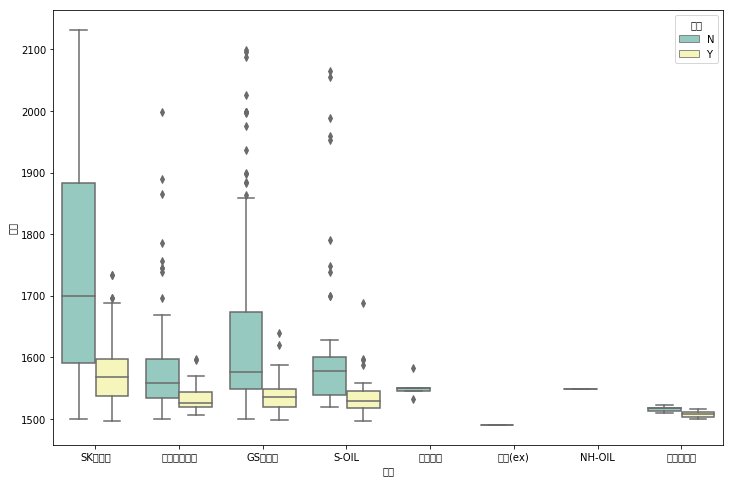

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")

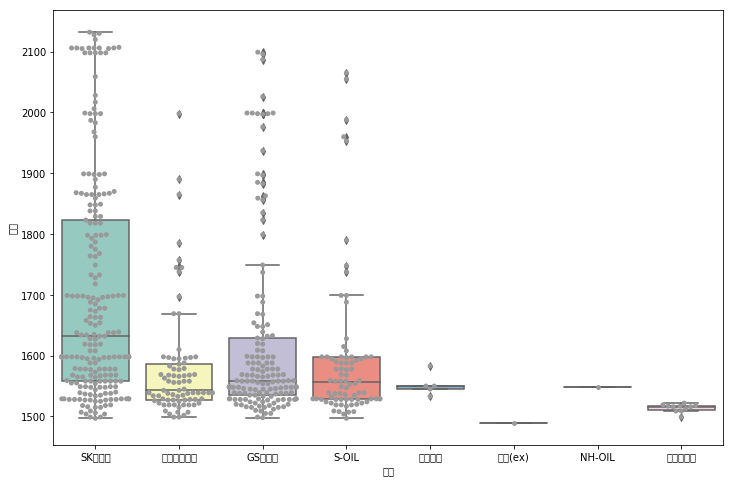

In [104]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격",  data=stations, color=".6")
plt.show()